In [146]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import seaborn as sns

In [148]:
df = sns.load_dataset('iris')

In [150]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [152]:
from sklearn.preprocessing import LabelEncoder

In [154]:
encoder = LabelEncoder()

In [156]:
df['species'] = encoder.fit_transform(df['species'])

In [158]:
df['species'].unique()

array([0, 1, 2])

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [160]:
df = df[df['species'] != 0][['sepal_width','petal_length','species']]

In [166]:
df

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [33]:
df.head()

,sepal_width,petal_length,species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

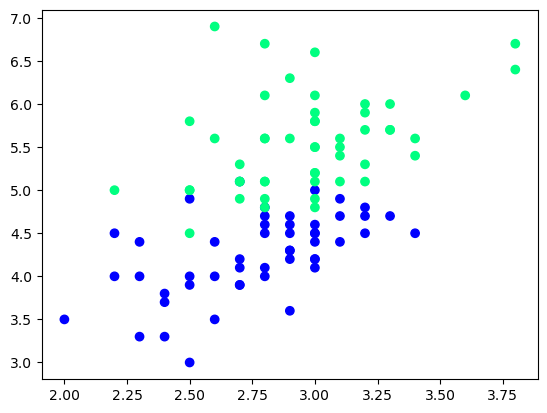

In [41]:
plt.scatter(df['sepal_width'],df['petal_length'],c=df['species'],cmap='winter')

In [61]:
df_train = df.iloc[:60,:].sample(10)
df_train

,sepal_width,petal_length,species
55,2.8,4.5,1
143,3.2,5.9,2
101,2.7,5.1,2
90,2.6,4.4,1
88,3.0,4.1,1
97,2.9,4.3,1
125,3.2,6.0,2
66,3.0,4.5,1
58,2.9,4.6,1
120,3.2,5.7,2


In [178]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [180]:
df_train

,sepal_width,petal_length,species
131,3.8,6.4,2
128,2.8,5.6,2
68,2.2,4.5,1
74,2.9,4.3,1
121,2.8,4.9,2
103,2.9,5.6,2
69,2.5,3.9,1
84,3.0,4.5,1
77,3.0,5.0,1
134,2.6,5.6,2


In [182]:
df_val

,sepal_width,petal_length,species
102,3.0,5.9,2
64,2.9,3.6,1
116,3.0,5.5,2
51,3.2,4.5,1
95,3.0,4.2,1


In [71]:
df_test

,sepal_width,petal_length,species
97,2.9,4.3,1
85,3.4,4.5,1
76,2.8,4.8,1
108,2.5,5.8,2
87,2.3,4.4,1


In [186]:
df_val.iloc[:,0:2].values

array([[3. , 5.9],
       [2.9, 3.6],
       [3. , 5.5],
       [3.2, 4.5],
       [3. , 4.2]])

In [188]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [190]:
y_test

array([2, 1, 2, 1, 1])

# Case 1 - Bagging

In [196]:
df_train.sample(8,replace=True)

,sepal_width,petal_length,species
134,2.6,5.6,2
77,3.0,5.0,1
77,3.0,5.0,1
134,2.6,5.6,2
69,2.5,3.9,1
69,2.5,3.9,1
103,2.9,5.6,2
77,3.0,5.0,1


In [198]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal_width,petal_length,species
131,3.8,6.4,2
84,3.0,4.5,1
84,3.0,4.5,1
134,2.6,5.6,2
69,2.5,3.9,1
134,2.6,5.6,2
131,3.8,6.4,2
74,2.9,4.3,1


In [200]:
X

,sepal_width,petal_length
131,3.8,6.4
84,3.0,4.5
84,3.0,4.5
134,2.6,5.6
69,2.5,3.9
134,2.6,5.6
131,3.8,6.4
74,2.9,4.3


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [204]:
dt_bag1 = DecisionTreeClassifier()

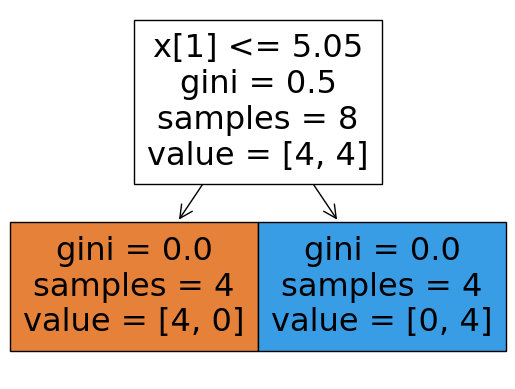

C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


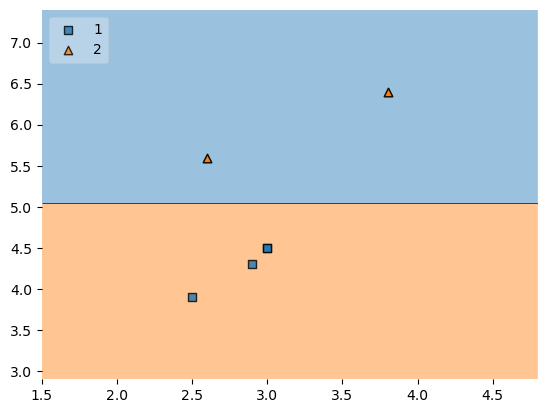

In [206]:
evaluate(dt_bag1,X,y)

In [208]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
69,2.5,3.9,1
84,3.0,4.5,1
121,2.8,4.9,2
69,2.5,3.9,1
77,3.0,5.0,1
77,3.0,5.0,1
74,2.9,4.3,1
128,2.8,5.6,2


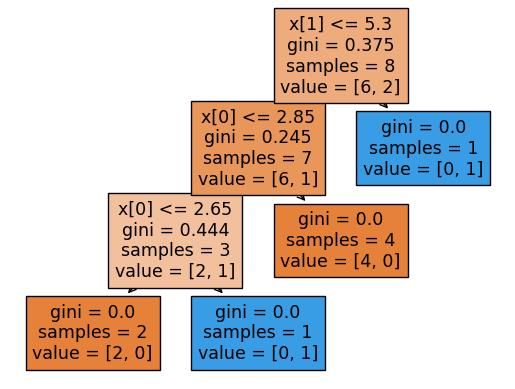

C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


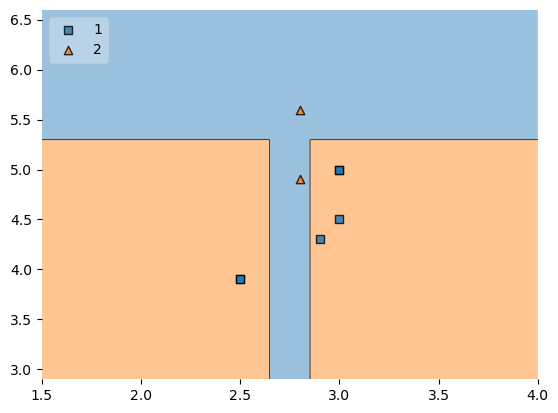

In [210]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [212]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal_width,petal_length,species
68,2.2,4.5,1
131,3.8,6.4,2
84,3.0,4.5,1
69,2.5,3.9,1
84,3.0,4.5,1
69,2.5,3.9,1
69,2.5,3.9,1
77,3.0,5.0,1


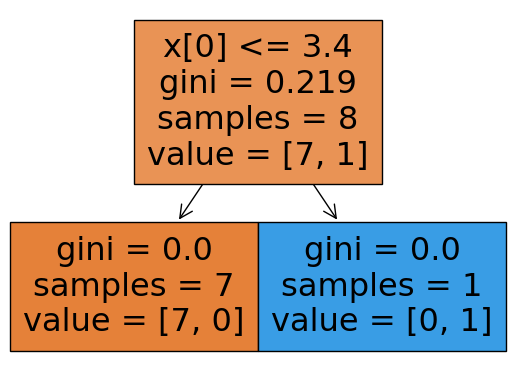

C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


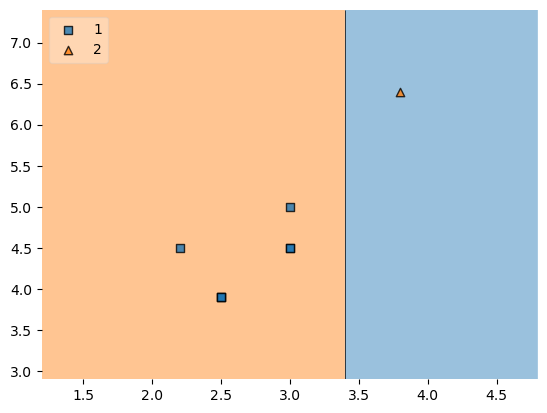

In [214]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [109]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf,filled=True)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

## Predict

In [216]:
df_test

,sepal_width,petal_length,species
120,3.2,5.7,2
125,3.2,6.0,2
117,3.8,6.7,2
147,3.0,5.2,2
54,2.8,4.6,1


In [222]:
print("Predictor 1",dt_bag1.predict(np.array([3.2	,6.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.2	,6.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.2	,6.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [1]


C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\cipl\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting (Row Sampling without replacement)

In [230]:
# Row sampling without replacement
df_train

,sepal_width,petal_length,species
131,3.8,6.4,2
128,2.8,5.6,2
68,2.2,4.5,1
74,2.9,4.3,1
121,2.8,4.9,2
103,2.9,5.6,2
69,2.5,3.9,1
84,3.0,4.5,1
77,3.0,5.0,1
134,2.6,5.6,2


In [248]:
df_train.sample(8)

,sepal_width,petal_length,species
121,2.8,4.9,2
69,2.5,3.9,1
74,2.9,4.3,1
134,2.6,5.6,2
84,3.0,4.5,1
103,2.9,5.6,2
77,3.0,5.0,1
68,2.2,4.5,1


# Random Subspaces (columns Sampling)

In [250]:
df1 =sns.load_dataset('iris')
df1 = df1.sample(10)

In [252]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
139,6.9,3.1,5.4,2.1,virginica
85,6.0,3.4,4.5,1.6,versicolor
14,5.8,4.0,1.2,0.2,setosa
114,5.8,2.8,5.1,2.4,virginica
101,5.8,2.7,5.1,1.9,virginica
25,5.0,3.0,1.6,0.2,setosa
135,7.7,3.0,6.1,2.3,virginica
41,4.5,2.3,1.3,0.3,setosa
107,7.3,2.9,6.3,1.8,virginica


In [258]:
z=df1.iloc[:,:-1]

In [272]:
z.head()

,sepal_length,sepal_width,petal_length,petal_width
148,6.2,3.4,5.4,2.3
139,6.9,3.1,5.4,2.1
85,6.0,3.4,4.5,1.6
14,5.8,4.0,1.2,0.2
114,5.8,2.8,5.1,2.4


In [292]:
# columns sampling with in replacement
z.sample(2,replace=True,axis=1)

,sepal_length,petal_length
148,6.2,5.4
139,6.9,5.4
85,6.0,4.5
14,5.8,1.2
114,5.8,5.1
101,5.8,5.1
25,5.0,1.6
135,7.7,6.1
41,4.5,1.3
107,7.3,6.3


# Random Patches (Both row sampling & column sampling)

In [294]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
148,6.2,3.4,5.4,2.3,virginica
139,6.9,3.1,5.4,2.1,virginica
85,6.0,3.4,4.5,1.6,versicolor
14,5.8,4.0,1.2,0.2,setosa
114,5.8,2.8,5.1,2.4,virginica
101,5.8,2.7,5.1,1.9,virginica
25,5.0,3.0,1.6,0.2,setosa
135,7.7,3.0,6.1,2.3,virginica
41,4.5,2.3,1.3,0.3,setosa
107,7.3,2.9,6.3,1.8,virginica


In [312]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,petal_length,sepal_width
135,6.1,3.0
114,5.1,2.8
85,4.5,3.4
85,4.5,3.4
101,5.1,2.7
25,1.6,3.0
114,5.1,2.8
25,1.6,3.0
